<a href="https://colab.research.google.com/github/isismeira/classsificador_bons_pagadores_credito/blob/main/modelo_classificador_bons_pagadores_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo classificador de bons pagadores de crédito com Naive Bayes

O objetivo aqui é criar um modelo que, à partir de determinadas características de um novo cliente, indique se ele vai ser um bom pagador de crédito ou não

O dataset consiste dados de vários clientes de um banco alemão que fizeram solicitação de crédito, cada cliente possui algumas características e no final, eles são categorizados como bons ou maus pagadores de crédito

O algoritmo utilizado vai ser o Naive Bayes: baseado no Teorema de Bayes, que considera as probabilidades de forma independente

## Importações de bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split # para dividir os dados entre treino e teste
from sklearn.naive_bayes import GaussianNB # para usar o Naive Bayes
from sklearn.preprocessing import LabelEncoder # para converter valores categóricos em números inteiros
from sklearn.metrics import confusion_matrix, accuracy_score # para visualizar a acurácia do modelo
from yellowbrick.classifier import ConfusionMatrix # matriz de confusão de forma gráfico

## Conhecendo o dataset

In [7]:
dados = pd.read_csv('Credit.csv')
dados.shape # 1000 instâncias, 21 atributos

(1000, 21)

In [8]:
dados.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [9]:
previsores = dados.iloc[:,0:20].values
classe = dados.iloc[:,20].values # a classe corresponde a última coluna

## Transformação de atributos

Para lidar com atributos categóricos, é necessário transformar esses atributos em numéricos. Já que algoritmos de Machine Learning não lidam bem com esses tipos de dados

Precisamos criar um objeto para cada atributo categórico, pois na sequência vamos executar o processo de encoding novamente para o registro de teste
Se forem utilizados objetos diferentes, o número atribuído a cada valor poderá ser diferente, o que deixará o teste inconsistente

In [10]:
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0]) # transformação do checking status

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2]) # transformação do credit_history

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])

## Divisão entre treino e teste

Necessário para evitar ter um modelo superajustado

In [11]:
# 30% para testar e 70% para testar
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

## Treinamento e acurácia do modelo

Criação e treinamento do modelo (criação da tabela de probabilidade)

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

Agora, testar o modelo

In [14]:
previsoes = naive_bayes.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

Comparar a previsão com as classes reais dos dados usando uma matriz de confusão

In [16]:
matriz_confusao = confusion_matrix(y_teste, previsoes)
matriz_confusao

array([[ 41,  45],
       [ 42, 172]])

41 - 175 foi o que ele acertou e 45 - 42 o que ele errou. É mais fácil entender essa pontuação com porcentagem

In [17]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.71

71% de acerto

Por curiosidade, vou criar uma matriz de confusão mais visual, utilizando a biblioteca YellowBrick

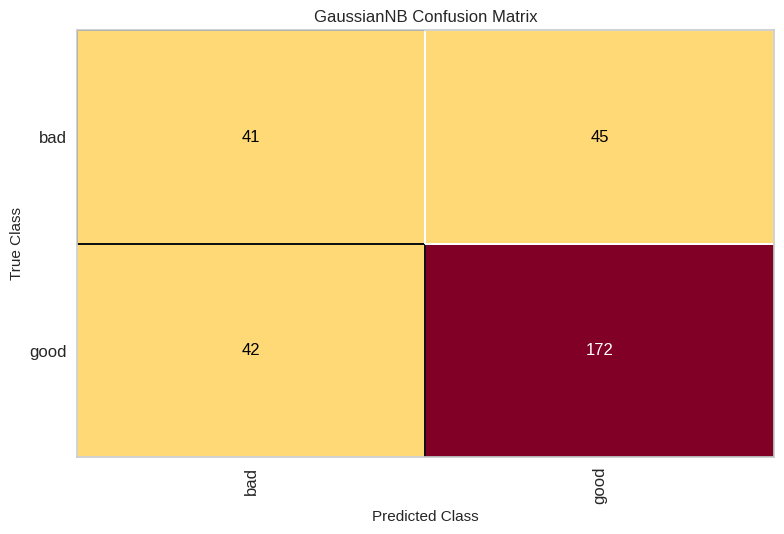

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [18]:
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

O modelo parece especialmente bom na hora de acertar quais clientes são bons pagadores de crédito

## Como o modelo classificaria um novo cliente?

In [21]:
novo_cliente = pd.read_csv('NovoCliente.csv')
novo_cliente.shape # esse csv corresponde a apenas um único cliente (1 linha)

(1, 20)

In [22]:
novo_cliente

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


O cliente também não veio com a classe, já que isso o modelo que vai prever

Agora, transformar os atributos do novo cliente de categóricos para númericos

In [24]:
novo_cliente = novo_cliente.iloc[:,0:20].values
novo_cliente[:,0] = labelencoder1.transform(novo_cliente[:,0])
novo_cliente[:, 2] = labelencoder2.transform(novo_cliente[:, 2])
novo_cliente[:, 3] = labelencoder3.transform(novo_cliente[:, 3])
novo_cliente[:, 5] = labelencoder4.transform(novo_cliente[:, 5])
novo_cliente[:, 6] = labelencoder5.transform(novo_cliente[:, 6])
novo_cliente[:, 8] = labelencoder6.transform(novo_cliente[:, 8])
novo_cliente[:, 9] = labelencoder7.transform(novo_cliente[:, 9])
novo_cliente[:, 11] = labelencoder8.transform(novo_cliente[:, 11])
novo_cliente[:, 13] = labelencoder9.transform(novo_cliente[:, 13])
novo_cliente[:, 14] = labelencoder10.transform(novo_cliente[:, 14])
novo_cliente[:, 16] = labelencoder11.transform(novo_cliente[:, 16])
novo_cliente[:, 18] = labelencoder12.transform(novo_cliente[:, 18])
novo_cliente[:, 19] = labelencoder13.transform(novo_cliente[:, 19])

Tudo pronto para a previsão!

In [25]:
naive_bayes.predict(novo_cliente)

array(['good'], dtype='<U4')

Novo cliente classificado como um bom pagador de crédito